<a href="https://colab.research.google.com/github/hvakanksha/AML_Assignment/blob/main/AML_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
# Convert to DataFrame for EDA
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Descriptive statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

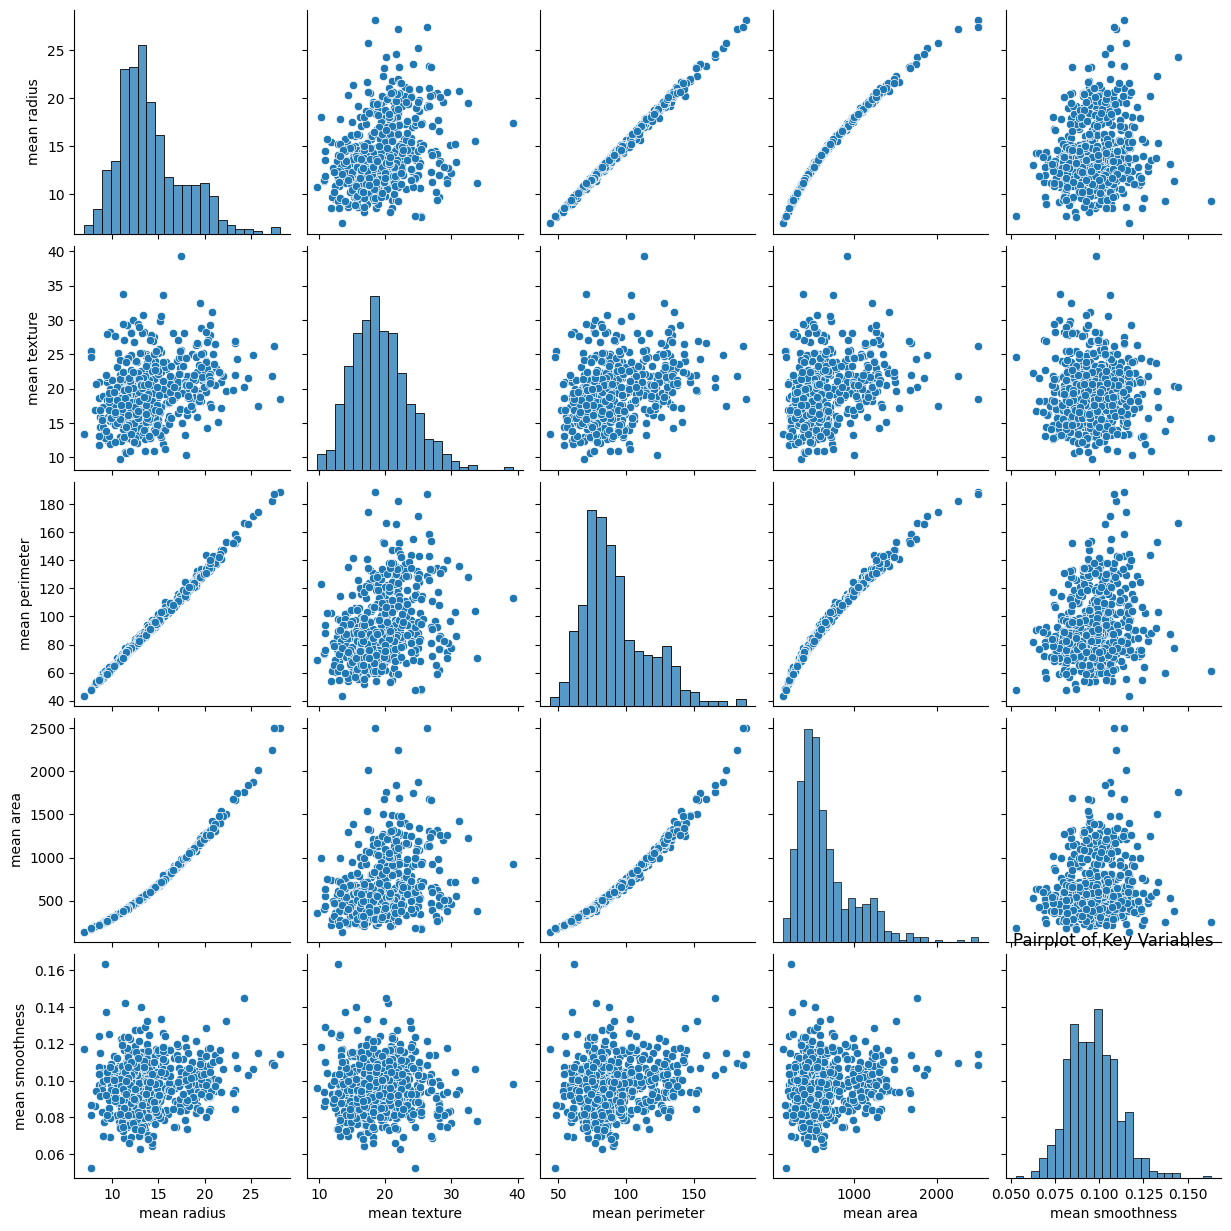

In [ ]:
sns.pairplot(df[[ 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']])
plt.title("Pairplot of Key Variables")
plt.show()


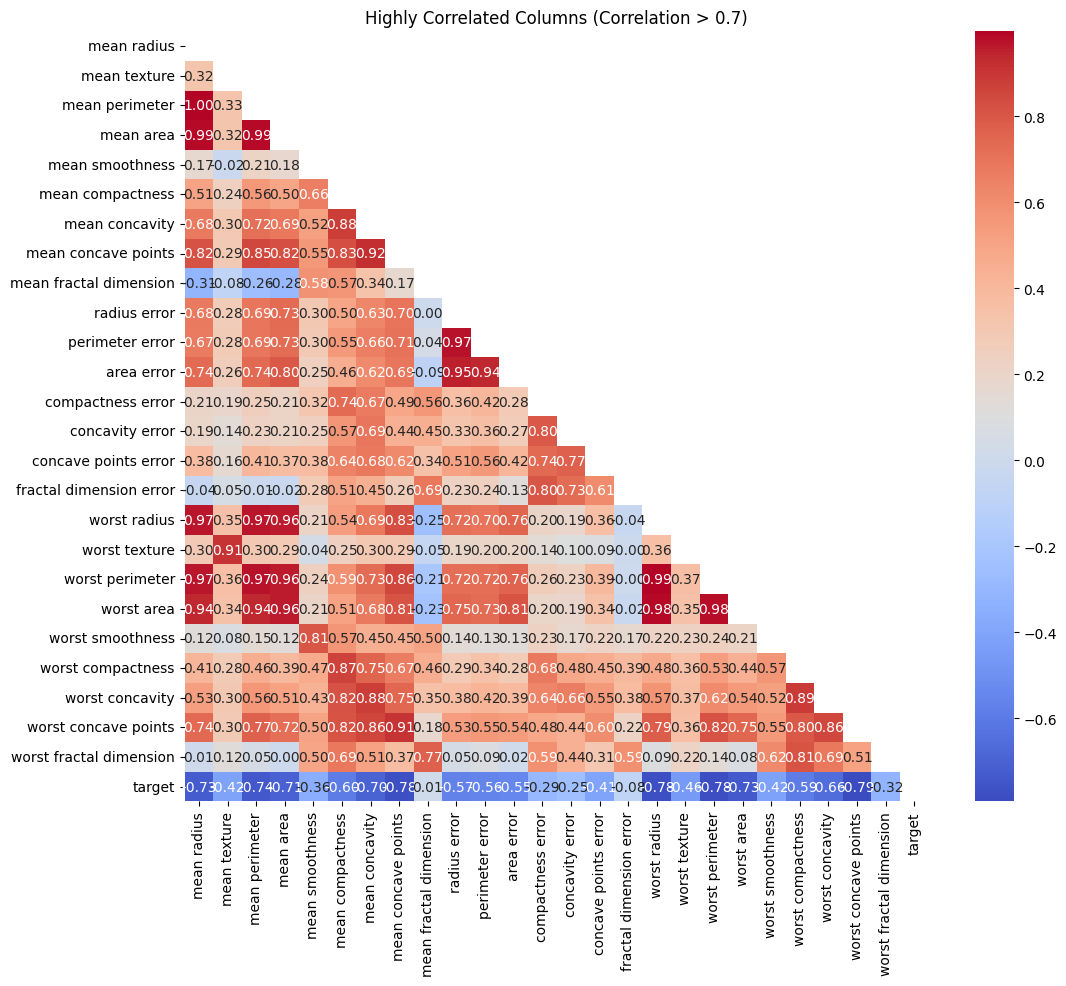

In [ ]:
# Filter highly correlated columns
highly_correlated_cols = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Get the names of highly correlated columns
selected_cols = correlation_matrix.columns[highly_correlated_cols.any()]

# Create a new correlation matrix with only highly correlated columns
selected_corr_matrix = correlation_matrix.loc[selected_cols, selected_cols]

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(selected_corr_matrix, dtype=bool))

# Plot the heatmap for highly correlated columns
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Highly Correlated Columns (Correlation > 0.7)')
plt.show()


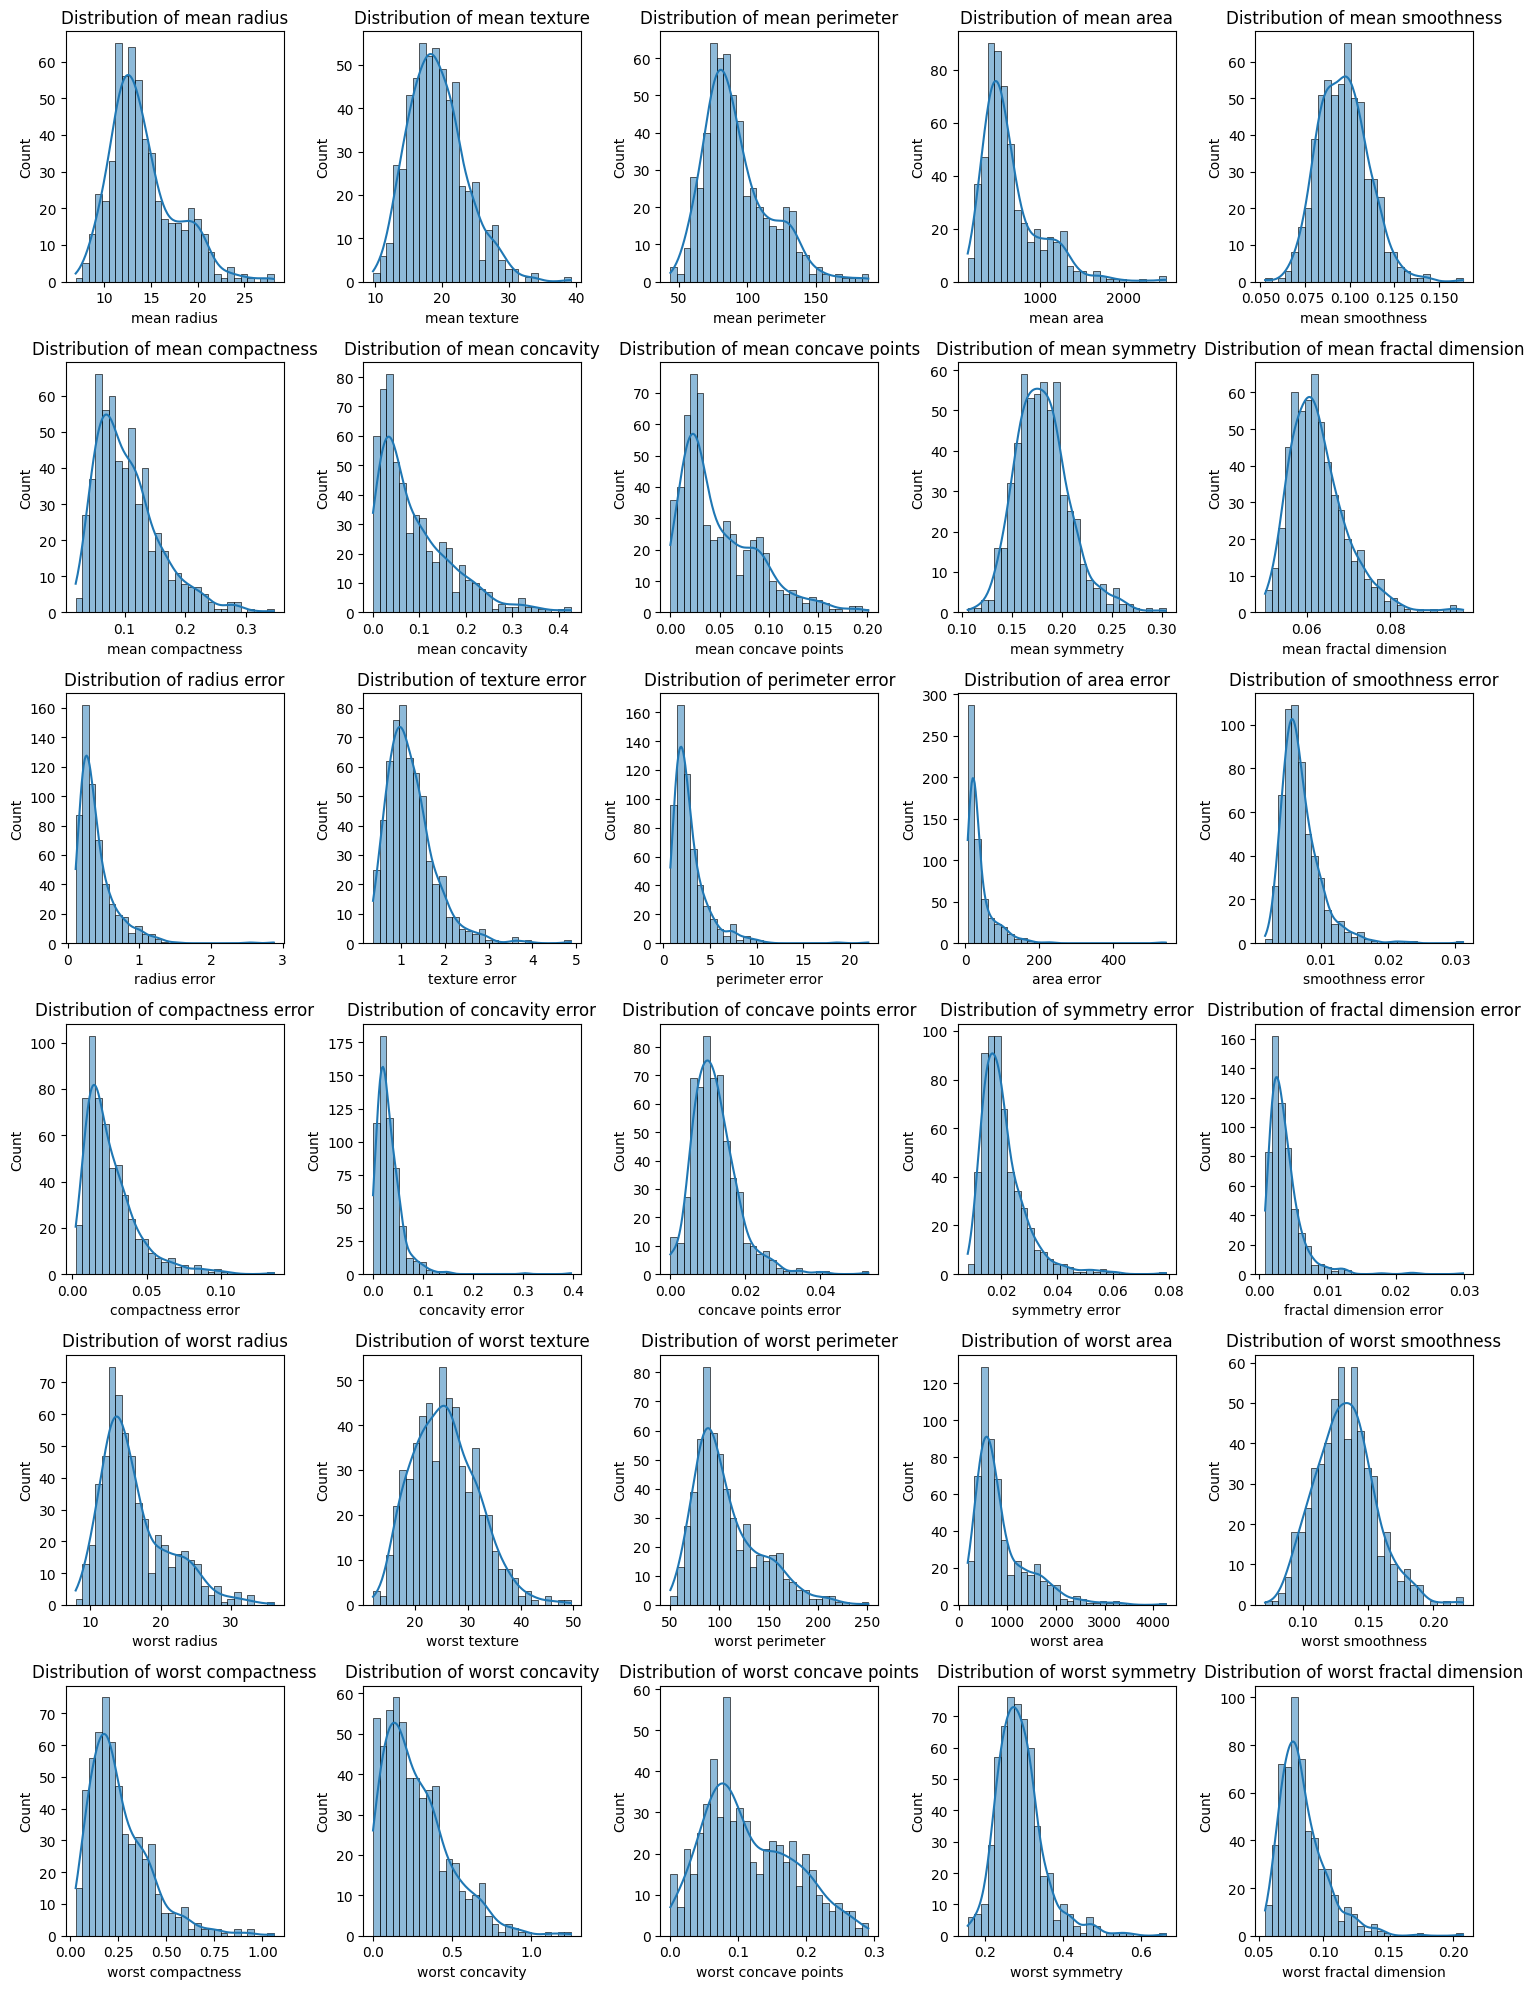

In [ ]:
# Plot histograms for each feature
num_features = len(cancer.feature_names)
rows = 6
cols = 5

plt.figure(figsize=(15, 20))
for i, feature in enumerate(cancer.feature_names):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

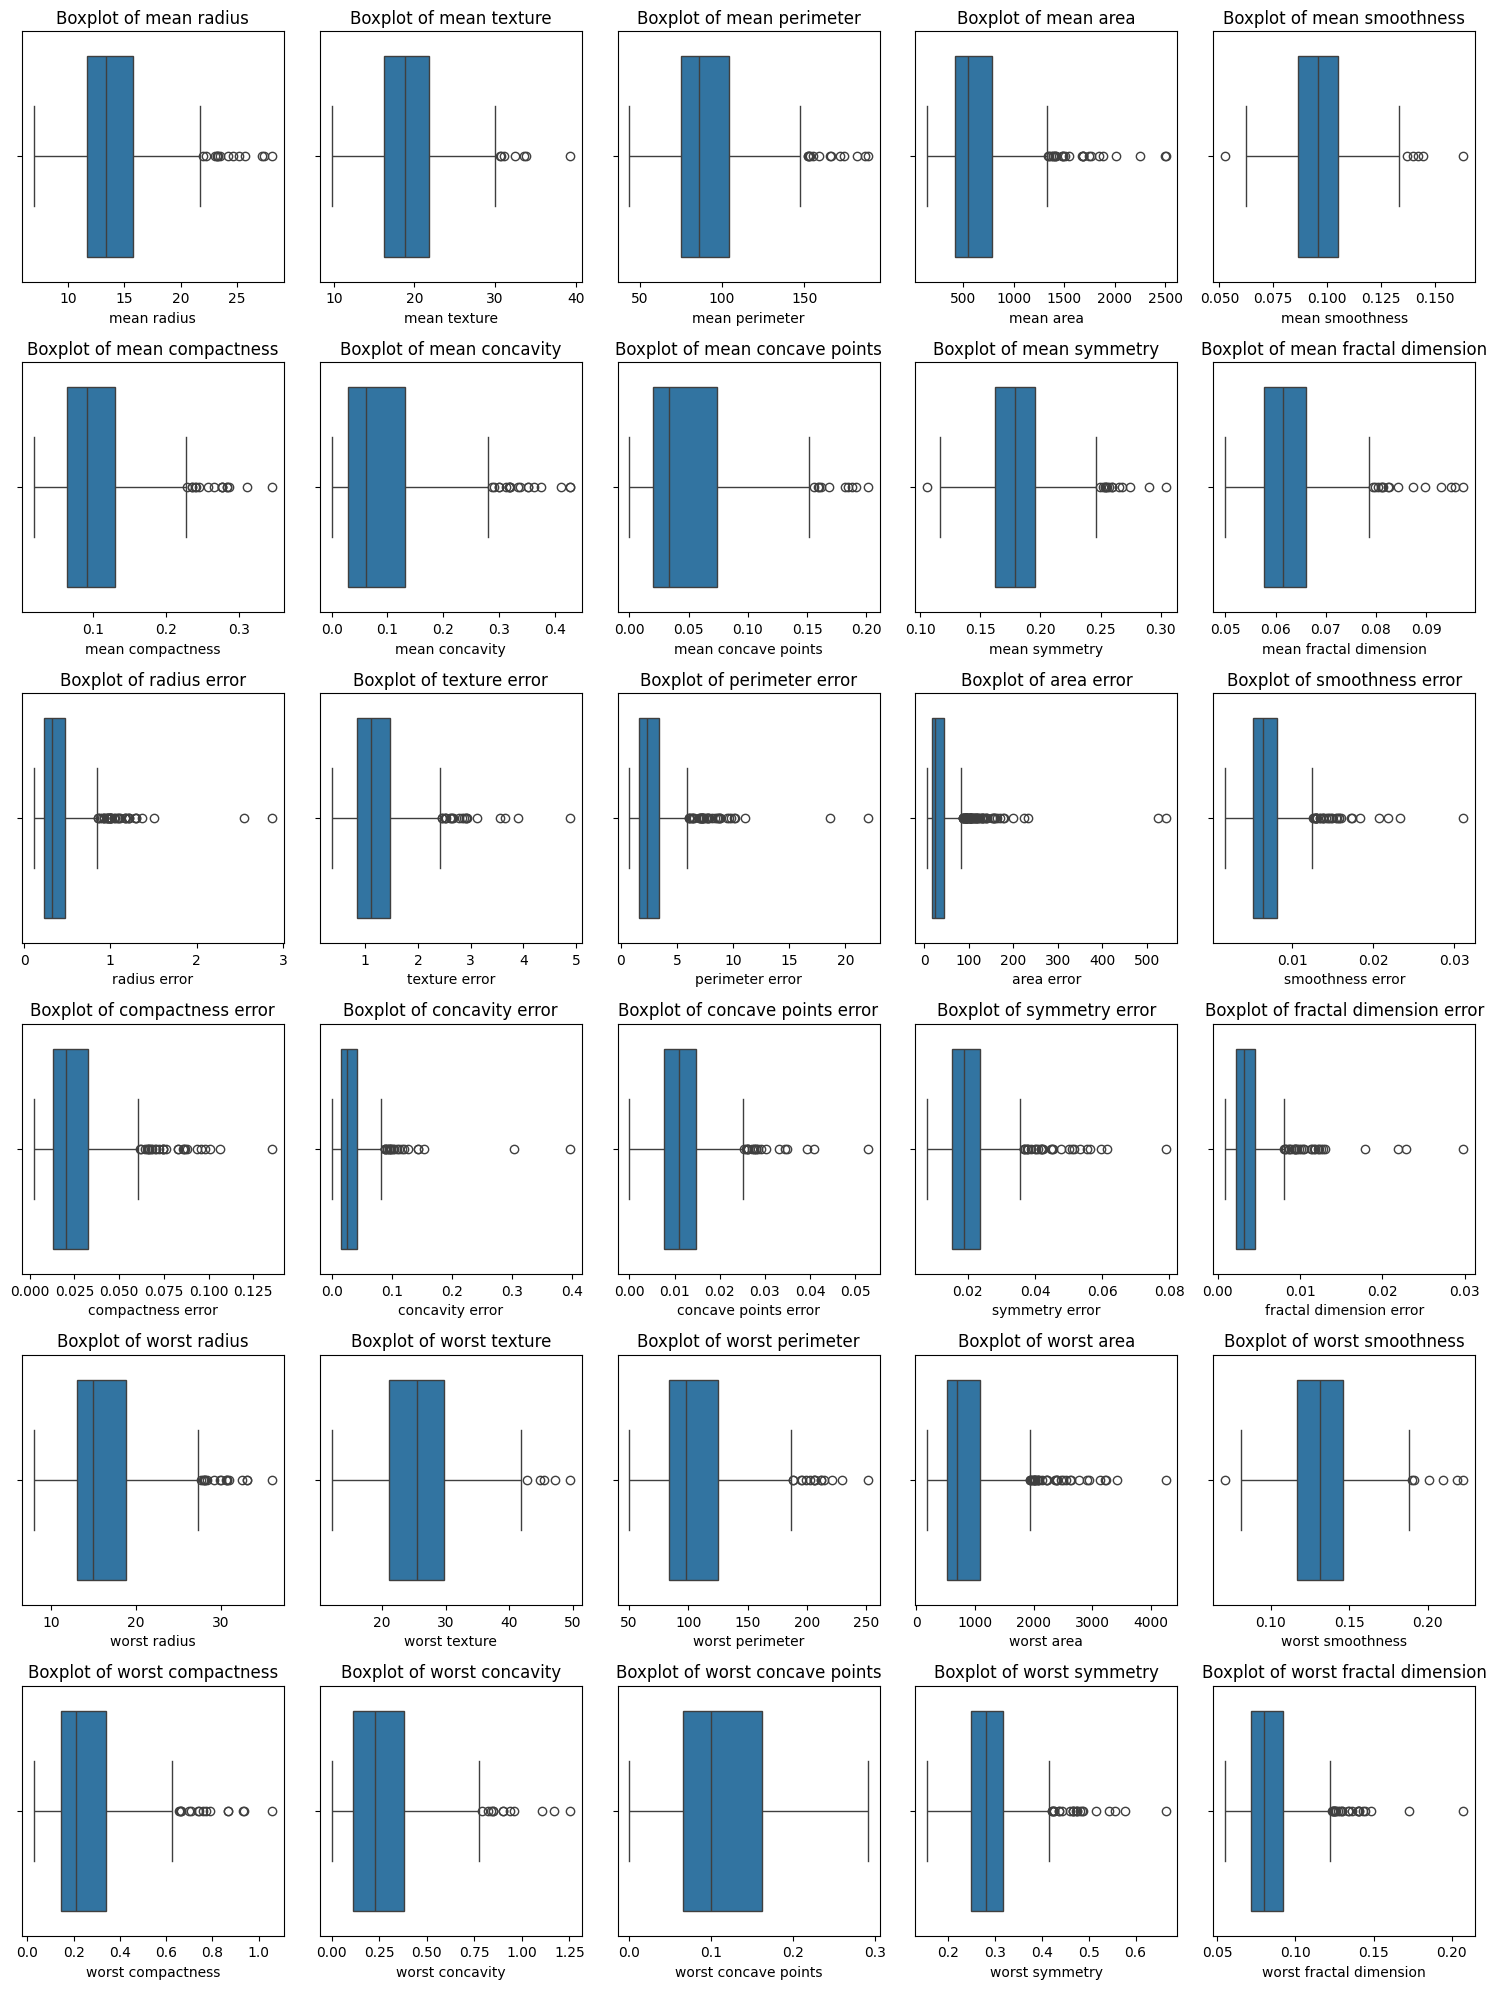

In [ ]:
# Outlier Detection
#Plot boxplots for each feature
num_features = len(cancer.feature_names)
rows = 6
cols = 5

plt.figure(figsize=(15, 20))
for i, feature in enumerate(cancer.feature_names):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each column
    outliers = (df < lower_bound) | (df > upper_bound)

    # Remove rows containing outliers
    df_no_outliers = df[~outliers.any(axis=1)]

    return df_no_outliers

# Apply the function to remove outliers
df_no_outliers = remove_outliers_iqr(df)

# Display the shape of the DataFrame before and after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Shape before removing outliers: (569, 31)
Shape after removing outliers: (398, 31)


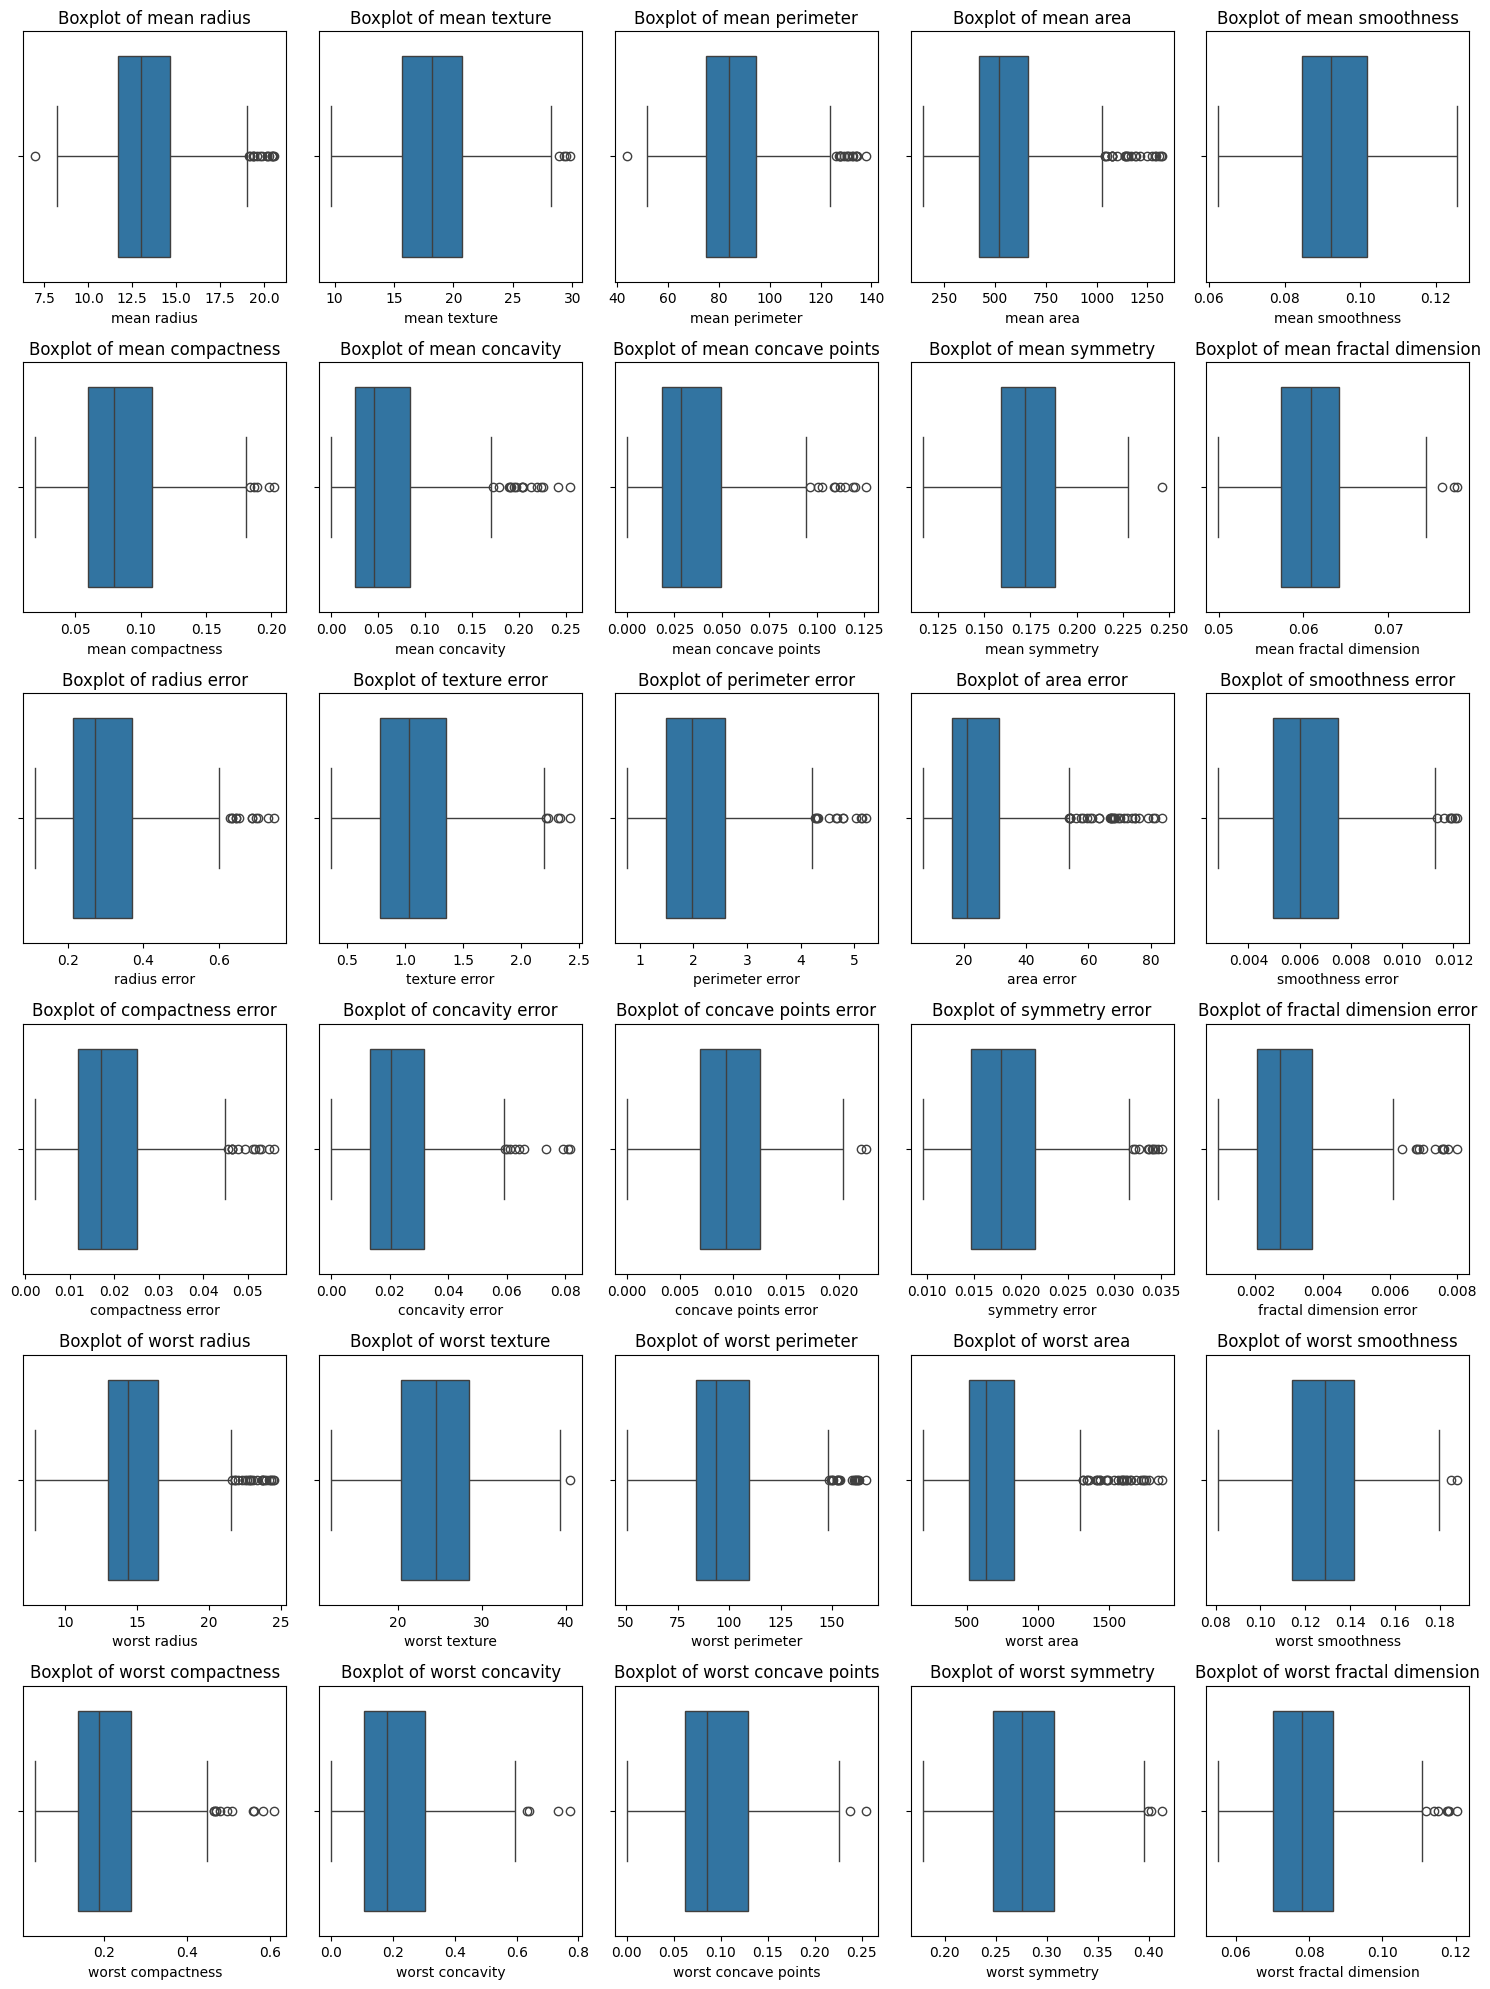

In [ ]:
#After Outlier Treatment
#Plot boxplots for each feature
num_features = len(cancer.feature_names)
rows = 6
cols = 5

plt.figure(figsize=(15, 20))
for i, feature in enumerate(cancer.feature_names):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x=df_no_outliers[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

Explained variance ratio: [4.25290157e-01 1.87029171e-01 1.00377253e-01 6.38878533e-02
 6.31585595e-02 4.03607386e-02 2.71366446e-02 1.76653784e-02
 1.54743288e-02 1.13947256e-02 1.05053056e-02 9.36430756e-03
 7.81625475e-03 6.00182173e-03 3.56535285e-03 2.44509627e-03
 1.55372912e-03 1.37179296e-03 1.17232285e-03 9.55354290e-04
 7.71723292e-04 6.94847954e-04 5.33170875e-04 4.50766579e-04
 4.08338857e-04 2.96309304e-04 2.43820445e-04 5.24322779e-05
 1.92160199e-05 3.22619208e-06]
Cumulative explained variance ratio: [0.42529016 0.61231933 0.71269658 0.77658443 0.83974299 0.88010373
 0.90724038 0.92490576 0.94038008 0.95177481 0.96228012 0.97164442
 0.97946068 0.9854625  0.98902785 0.99147295 0.99302668 0.99439847
 0.99557079 0.99652615 0.99729787 0.99799272 0.99852589 0.99897666
 0.999385   0.99968131 0.99992513 0.99997756 0.99999677 1.        ]


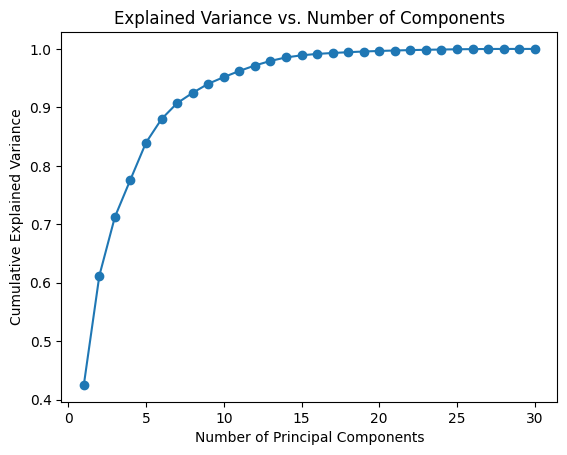

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_outliers.drop(columns=['target']))  # Exclude the target column

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

# Plot the explained variance ratio
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

Classification Results:
Logistic Regression: 0.9737
KNN: 0.9474
SVM: 0.9825
Decision Tree: 0.9737
Random Forest: 0.9474
Naive Bayes: 0.8684
MLP Classifier: 0.9649


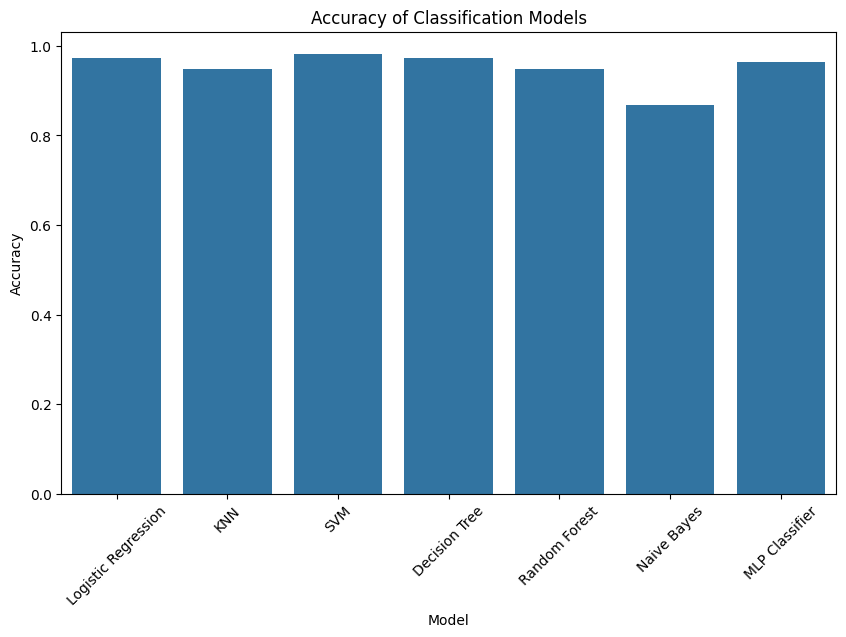

In [ ]:



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier()
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {'clf__C': [0.1, 1, 10]},
    'KNN': {'clf__n_neighbors': [3, 5, 7]},
    'SVM': {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.1, 1, 'scale']},
    'Decision Tree': {'clf__max_depth': [None, 5, 10, 15]},
    'Random Forest': {'clf__n_estimators': [50, 100, 200]},
    'MLP Classifier': {'clf__hidden_layer_sizes': [(100,), (50, 50)], 'clf__alpha': [0.0001, 0.001, 0.01]}
}

# Perform GridSearchCV for each classifier
best_models = {}
for name, clf in classifiers.items():
    if name in param_grids:
        pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('clf', clf)])
        grid_search = GridSearchCV(pipe, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('clf', clf)])
        pipe.fit(X_train, y_train)
        best_models[name] = pipe

# Evaluate models on test data
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
print("Classification Results:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Accuracy of Classification Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


Model: Logistic Regression
  Accuracy: 0.9500
  Precision: 0.9474
  Recall: 0.9818
  F1 Score: 0.9643
  Best Parameters: {'clf__C': 10}

Model: KNN
  Accuracy: 0.9500
  Precision: 0.9322
  Recall: 1.0000
  F1 Score: 0.9649
  Best Parameters: {'clf__n_neighbors': 5}

Model: SVM
  Accuracy: 0.9625
  Precision: 0.9483
  Recall: 1.0000
  F1 Score: 0.9735
  Best Parameters: {'clf__C': 0.1, 'clf__kernel': 'linear'}

Model: Decision Tree
  Accuracy: 0.9250
  Precision: 0.9298
  Recall: 0.9636
  F1 Score: 0.9464
  Best Parameters: {'clf__max_depth': 3}

Model: Random Forest
  Accuracy: 0.9125
  Precision: 0.9138
  Recall: 0.9636
  F1 Score: 0.9381
  Best Parameters: {'clf__n_estimators': 50}

Model: Naive Bayes
  Accuracy: 0.9375
  Precision: 0.9464
  Recall: 0.9636
  F1 Score: 0.9550
  Best Parameters: {}



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MLP Classifier
  Accuracy: 0.9375
  Precision: 0.9310
  Recall: 0.9818
  F1 Score: 0.9558
  Best Parameters: {'clf__hidden_layer_sizes': (50,)}



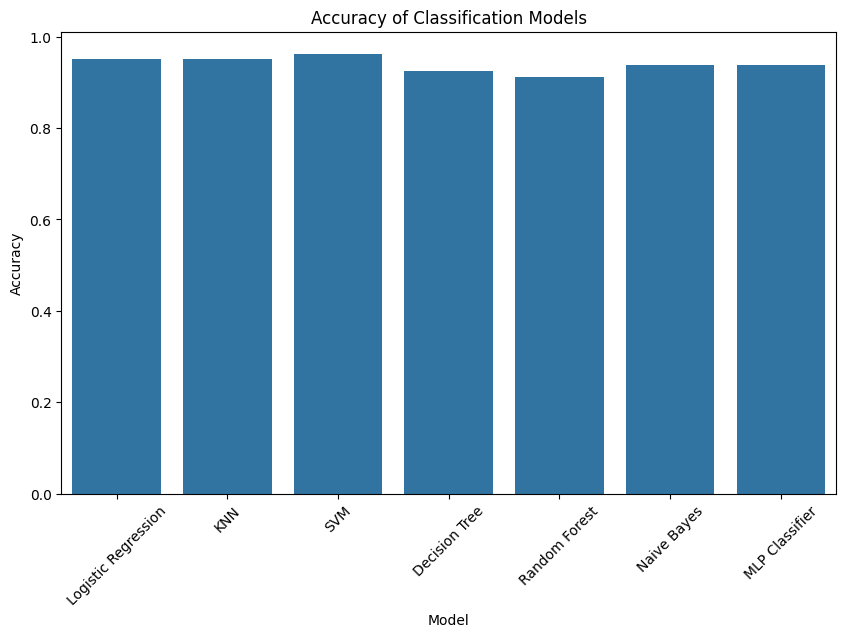

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier()
}

# Define parameter grids for grid search
param_grids = {
    'Logistic Regression': {'clf__C': [0.1, 1, 10]},
    'KNN': {'clf__n_neighbors': [3, 5, 7]},
    'SVM': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']},
    'Decision Tree': {'clf__max_depth': [3, 5, 7]},
    'Random Forest': {'clf__n_estimators': [50, 100, 200]},
    'Naive Bayes': {},
    'MLP Classifier': {'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)]}
}

# Initialize dictionary to store best models
best_models = {}

# Loop through classifiers and perform GridSearchCV
for name, clf in classifiers.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('clf', clf)])
    grid_search = GridSearchCV(pipe, param_grid=param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    # Evaluate best model
    best_model = best_models[name]
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print performance metrics
    print(f"Model: {name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Best Parameters: {grid_search.best_params_}")
    print()


# Initialize dictionary to store results
results = {}

# Loop through classifiers and perform GridSearchCV
for name, clf in classifiers.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('clf', clf)])
    grid_search = GridSearchCV(pipe, param_grid=param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    # Evaluate best model
    best_model = best_models[name]
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy in results dictionary
    results[name] = accuracy

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Accuracy of Classification Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Split data into features and target
X = df_no_outliers.drop(columns=['target'])
y = df_no_outliers['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier()
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'KNN': {'clf__n_neighbors': [3, 5, 7, 9]},
    'SVM': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']},
    'Decision Tree': {'clf__max_depth': [3, 5, 7, None]},
    'Random Forest': {'clf__n_estimators': [50, 100, 200], 'clf__max_depth': [3, 5, 7]},
    'Naive Bayes': {},  # No hyperparameters to tune
    'MLP Classifier': {'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)]}
}

# Train and evaluate models using GridSearchCV
results = []

for name, clf in classifiers.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    grid_search = GridSearchCV(pipe, param_grid=param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'Best Parameters': grid_search.best_params_,
                    'Accuracy': accuracy, 'Precision': precision,
                    'Recall': recall, 'F1 Score': f1})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

                 Model                                  Best Parameters  \
0  Logistic Regression                                   {'clf__C': 10}   
1                  KNN                          {'clf__n_neighbors': 5}   
2                  SVM         {'clf__C': 0.1, 'clf__kernel': 'linear'}   
3        Decision Tree                            {'clf__max_depth': 7}   
4        Random Forest  {'clf__max_depth': 7, 'clf__n_estimators': 100}   
5          Naive Bayes                                               {}   
6       MLP Classifier               {'clf__hidden_layer_sizes': (50,)}   

   Accuracy  Precision    Recall  F1 Score  
0    0.9500   0.947368  0.981818  0.964286  
1    0.9500   0.932203  1.000000  0.964912  
2    0.9625   0.948276  1.000000  0.973451  
3    0.9500   0.947368  0.981818  0.964286  
4    0.9250   0.901639  1.000000  0.948276  
5    0.9125   0.944444  0.927273  0.935780  
6    0.9375   0.946429  0.963636  0.954955  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
